In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/FYDP/signatures/full_org" |wc -l

1320


In [ ]:
!ls "/content/drive/MyDrive/FYDP/preprocessed_signatures/full_org" |wc -l

1320


In [ ]:
!ls "/content/drive/MyDrive/FYDP/signatures/full_forg" |wc -l

1320


# **Visualization of the Original Images**

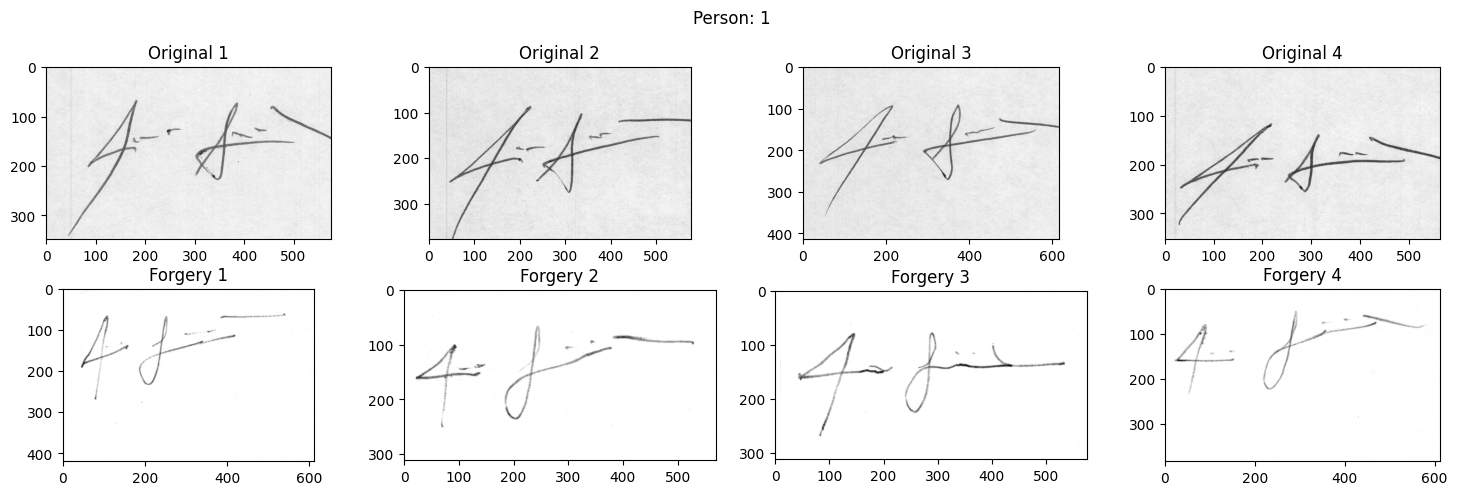

Number of Original Images: 24
Number of Forgery Images: 24


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Define the directories for original signatures
org = '/content/drive/MyDrive/FYDP/signatures/full_org'
forg = '/content/drive/MyDrive/FYDP/signatures/full_forg'

# Function to get image paths for a given person
def get_image_paths(person, directory, img_type):
    img_paths = []
    for file in os.listdir(directory):
        if file.startswith(f"{img_type}_{person}_"):
            img_paths.append(os.path.join(directory, file))
    return img_paths

# Define the person for visualization
person = 1  # Change this to the desired person number

# Get original image paths for the person
original_img_paths = get_image_paths(person, org, "original")
forgery_img_paths = get_image_paths(person, forg, "forgeries")

# Check if the lists have the same length
if len(original_img_paths) != len(forgery_img_paths):
    raise ValueError("Number of original and forgery images do not match.")

# Display the images
fig = plt.figure(figsize=(15, 5))
for i in range(min(4, len(original_img_paths))):
    # Display original images
    org_img = cv2.imread(original_img_paths[i], cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 4, i + 1)
    plt.imshow(org_img, cmap="gray")
    plt.title(f"Original {i+1}")

    # Display forgery images
    forg_img = cv2.imread(forgery_img_paths[i], cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 4, i + 5)
    plt.imshow(forg_img, cmap="gray")
    plt.title(f"Forgery {i+1}")

fig.suptitle(f"Person: {person}")
plt.tight_layout()
plt.show()

print("Number of Original Images:", len(original_img_paths))
print("Number of Forgery Images:", len(forgery_img_paths))


# **Preparing and Preprocessing the Image Data for Machine Learning**

In [ ]:
import cv2
import os
import shutil
forg = '/content/drive/MyDrive/FYDP/signatures/full_forg'
forg_p = '/content/drive/MyDrive/FYDP/preprocessed_signatures/full_forg'

#Iteratre over each image from directory
for file in os.listdir(forg):

  #construct full path to the image path
  file_path = os.path.join(forg, file)

  # read image using OpenCV
  img = cv2.imread(file_path)

  # check if image was successfully read
  if img is not None:

    #convert the image into grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # resize the image to (220, 155)
    resized_img = cv2.resize(gray_img, (230,160), interpolation= cv2.INTER_LINEAR)

    # Perform thresholing
    _, thresh_img = cv2.threshold(resized_img,230,255, cv2.THRESH_BINARY )

    # Save the Processed Image
    cv2.imwrite(os.path.join(forg_p, file), thresh_img)

    print(f"Processed and Saved : {file}")
  else:
    print(f"Error while Reading {file}")


Processed and Saved : forgeries_18_24.png
Processed and Saved : forgeries_1_24.png
Processed and Saved : forgeries_23_3.png
Processed and Saved : forgeries_19_12.png
Processed and Saved : forgeries_22_22.png
Processed and Saved : forgeries_26_22.png
Processed and Saved : forgeries_20_20.png
Processed and Saved : forgeries_22_13.png
Processed and Saved : forgeries_18_7.png
Processed and Saved : forgeries_26_24.png
Processed and Saved : forgeries_17_3.png
Processed and Saved : forgeries_27_16.png
Processed and Saved : forgeries_18_20.png
Processed and Saved : forgeries_1_16.png
Processed and Saved : forgeries_18_9.png
Processed and Saved : forgeries_1_23.png
Processed and Saved : forgeries_21_13.png
Processed and Saved : forgeries_17_7.png
Processed and Saved : forgeries_24_8.png
Processed and Saved : forgeries_23_17.png
Processed and Saved : forgeries_19_23.png
Processed and Saved : forgeries_16_14.png
Processed and Saved : forgeries_23_6.png
Processed and Saved : forgeries_1_15.png
Pro

In [ ]:
org = '/content/drive/MyDrive/FYDP/signatures/full_org'
org_p = '/content/drive/MyDrive/FYDP/preprocessed_signatures/full_org'


# Iterate over each image file in the directory
for f in os.listdir(org):
    # construct full path to the image file
    file_path = os.path.join(org, f)

    # Read the image using OpenCV
    img = cv2.imread(file_path)

    # Check if the image was successfully read
    if img is not None:
        # Convert the image into GrayScale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize the image to (220, 155)
        resize_img = cv2.resize(gray_img, (230, 160), interpolation=cv2.INTER_LINEAR)

        # Perform Thresholding
        _, thresh_img = cv2.threshold(resize_img, 230, 255, cv2.THRESH_BINARY)

        # Save the processed Image
        cv2.imwrite(os.path.join(org_p, f), thresh_img)

        print(f"Processed and saved: {f}")
    else:
        print(f"Error reading: {f}")

# **Visualization of the Preprocessed Images**

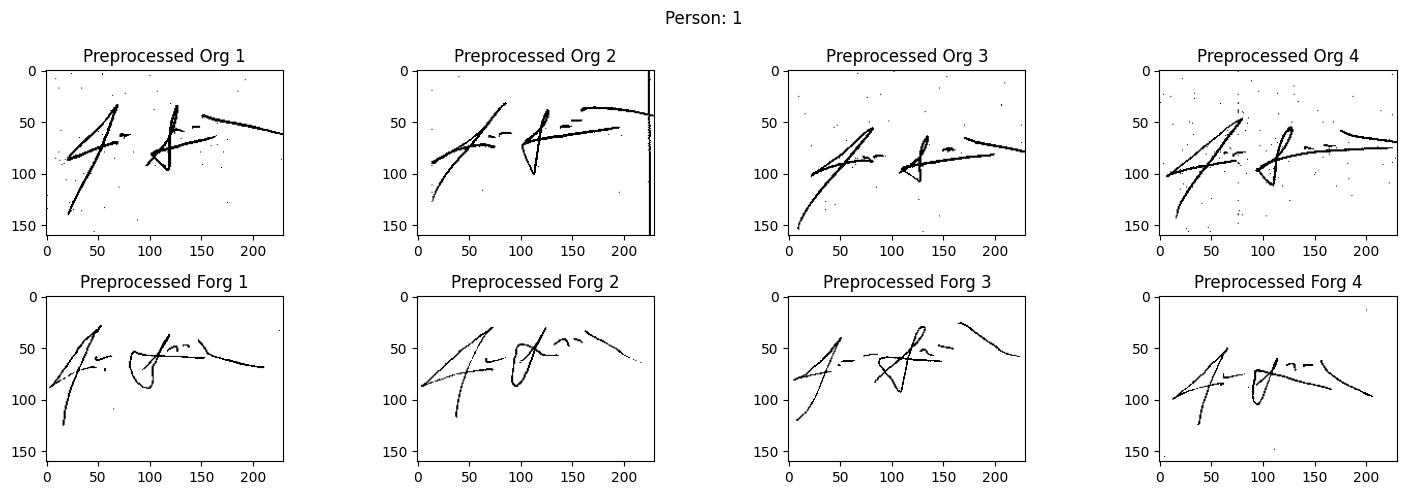

Number of Preprocessed Original Images: 24
Number of Preprocessed Forgery Images: 24


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Define the directories for preprocessed signatures
org_p = '/content/drive/MyDrive/FYDP/preprocessed_signatures/full_org'
forg_p = '/content/drive/MyDrive/FYDP/preprocessed_signatures/full_forg'

# Function to get image paths for a given person
def get_image_paths(person, directory, img_type):
    img_paths = []
    for file in os.listdir(directory):
        if file.startswith(f"{img_type}_{person}_"):
            img_paths.append(os.path.join(directory, file))
    return img_paths

# Define the person for visualization
person = 1  # Change this to the desired person number

# Get preprocessed image paths for the person
preprocessed_org_paths = get_image_paths(person, org_p, "original")
preprocessed_forg_paths = get_image_paths(person, forg_p, "forgeries")

# Check if the lists have the same length
if len(preprocessed_org_paths) != len(preprocessed_forg_paths):
    raise ValueError("Number of preprocessed original and forgery images do not match.")

# Display the preprocessed images
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
for i in range(min(4, len(preprocessed_org_paths))):
    # Display preprocessed original images
    preprocessed_org_img = cv2.imread(preprocessed_org_paths[i], cv2.IMREAD_GRAYSCALE)
    axes[0, i].imshow(preprocessed_org_img, cmap="gray")
    axes[0, i].set_title(f"Preprocessed Org {i+1}")

    # Display preprocessed forgery images
    preprocessed_forg_img = cv2.imread(preprocessed_forg_paths[i], cv2.IMREAD_GRAYSCALE)
    axes[1, i].imshow(preprocessed_forg_img, cmap="gray")
    axes[1, i].set_title(f"Preprocessed Forg {i+1}")

# Set titles
fig.suptitle(f"Person: {person}")
plt.tight_layout()
plt.show()

print("Number of Preprocessed Original Images:", len(preprocessed_org_paths))
print("Number of Preprocessed Forgery Images:", len(preprocessed_forg_paths))


# **Now creating the Pairs of Images**

In [ ]:
import cv2
import os
import numpy as np

# Define file paths
path = '/content/drive/MyDrive/FYDP/preprocessed_signatures'
org_path = os.path.join(path, "full_org")
forg_path = os.path.join(path, "full_forg")

# Function to convert image to grayscale
def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Function to generate original-original pairs in batches
def generate_orig_orig_pairs(original, org_path, to_gray, BATCH_SIZE):
    orig_orig_pairs = []
    for i in range(0, len(original), BATCH_SIZE):
        batch_end = min(i + BATCH_SIZE, len(original))
        batch_imgs = [cv2.imread(os.path.join(org_path, filename)) for filename in original[i:batch_end]]
        batch_gray_imgs = [to_gray(img) for img in batch_imgs]
        for j, img1 in enumerate(batch_gray_imgs):
            for img2 in batch_gray_imgs[j+1:]:
                orig_orig_pairs.append([img1, img2])
    return orig_orig_pairs

# Function to generate forged-forged pairs in batches
def generate_forg_forg_pairs(forged, forg_path, to_gray, BATCH_SIZE):
    forg_forg_pairs = []
    for i in range(0, len(forged), BATCH_SIZE):
        batch_end = min(i + BATCH_SIZE, len(forged))
        batch_imgs = [cv2.imread(os.path.join(forg_path, filename)) for filename in forged[i:batch_end]]
        batch_gray_imgs = [to_gray(img) for img in batch_imgs]
        for j, img1 in enumerate(batch_gray_imgs):
            for img2 in batch_gray_imgs[j+1:]:
                forg_forg_pairs.append([img1, img2])
    return forg_forg_pairs

# Get list of original and forged filenames, filtering out non-image files
original = [filename for filename in os.listdir(org_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
original.sort()
forged = [filename for filename in os.listdir(forg_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
forged.sort()

# Set batch size
BATCH_SIZE = 32

# Generate original-original pairs in batches
orig_orig_pairs = generate_orig_orig_pairs(original, org_path, to_gray, BATCH_SIZE)



In [ ]:
# Generate forged-forged pairs in batches
forg_forg_pairs = generate_forg_forg_pairs(forged, forg_path, to_gray, BATCH_SIZE)

# Convert lists to numpy arrays
orig_orig_pairs = np.array(orig_orig_pairs)
forg_forg_pairs = np.array(forg_forg_pairs)

# Save arrays to files
np.save(os.path.join(path, 'orig_orig_pairs.npy'), orig_orig_pairs)
np.save(os.path.join(path, 'forg_forg_pairs.npy'), forg_forg_pairs)


# Building the Model using The VGG19

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score


In [ ]:

# Define the size for resizing images
size = (230, 160)
path = '/content/drive/MyDrive/FYDP/preprocessed_signatures'

# Function to preprocess images
def preprocess_images(dataset_paths, size):
    X = []
    labels = []
    for image_path in dataset_paths:
        label = image_path.split(os.path.sep)[-2]
        labels.append(label)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=size)
        image = tf.keras.preprocessing.image.img_to_array(img)
        img_array_expanded_dims = np.expand_dims(image, axis=0)
        X.append(tf.keras.applications.vgg19.preprocess_input(img_array_expanded_dims))

    X = np.array(X, dtype="float32")
    labels = np.array(labels)

    print("{0} images with {1} classes".format(len(X), len(set(labels))))
    return X, labels

# Load the dataset paths
dataset_paths = glob.glob(path + "/**/*.png")



In [ ]:
# Preprocess the images
X, labels = preprocess_images(dataset_paths, size)

# Save the preprocessed images
np.save(path + '/X.npy', X)

# Encode the labels
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
y = to_categorical(labels)
np.save(path + "/y.npy", y)
np.save(path + "/classes.npy", le.classes_)


In [ ]:
# Loading X, Y and Classes
X = np.load(path+ "/X.npy")
y = np.load(path + "/y.npy")

X = X.reshape(len(dataset_paths), size[0], size[1], 3)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=24)

# Data Augmentation
image_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest')



In [ ]:

# Define the VGG19-based model
def create_model(hp, training=True, output_shape=y.shape[1]):
    base = VGG19(weights='imagenet',
                 include_top=False,
                 input_tensor=Input(shape=(size[0], size[1], 3)))
    top = base.output
    top = AveragePooling2D(pool_size=(2, 2))(top)
    top = Flatten(name="flatten")(top)

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

    top = Dense(units=hp_units, activation='relu')(top)
    top = Dropout(0.5)(top)
    top = Dense(output_shape, activation='softmax')(top)

    model = Model(inputs=base.input, outputs=top)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    if training:
        for layer in base.layers:
            layer.trainable = True
        optimizer = Adam(learning_rate=hp_learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [ ]:
# Hyperband tuner
tuner = kt.Hyperband(create_model,
                     objective='val_accuracy',
                     max_epochs=8,
                     factor=3,
                     directory=path + "/my_dir_2",
                     project_name='CEDAR_Signatures')

EPOCHS = 10

modelp_es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)
tuner.search(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[modelp_es])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The Optimal number of units is : {best_hps.get('units')} and the optimal learning rate for the optimizer is : {best_hps.get('learning_rate')}")
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch : %d' % (best_epoch,))



Reloading Tuner from /content/drive/MyDrive/FYDP/preprocessed_signatures/my_dir_2/CEDAR_Signatures/tuner0.json
The Optimal number of units is : 512 and the optimal learning rate for the optimizer is : 0.0001
Epoch 1/10
66/66 [==============================] - 33s 431ms/step - loss: 0.6888 - accuracy: 0.7363 - val_loss: 0.2157 - val_accuracy: 0.9205
Epoch 2/10
66/66 [==============================] - 28s 430ms/step - loss: 0.2890 - accuracy: 0.8854 - val_loss: 0.1930 - val_accuracy: 0.9394
Epoch 3/10
66/66 [==============================] - 27s 405ms/step - loss: 0.1517 - accuracy: 0.9560 - val_loss: 0.2237 - val_accuracy: 0.9451
Epoch 4/10
66/66 [==============================] - 27s 417ms/step - loss: 0.1226 - accuracy: 0.9635 - val_loss: 0.1091 - val_accuracy: 0.9678
Epoch 5/10
66/66 [==============================] - 27s 412ms/step - loss: 0.0964 - accuracy: 0.9725 - val_loss: 0.0953 - val_accuracy: 0.9659
Epoch 6/10
66/66 [==============================] - 27s 409ms/step - loss: 0.

In [ ]:

hypermodel = tuner.hypermodel.build(best_hps)

modelp_checkpointer = ModelCheckpoint(filepath=path + "/CEDAR_Signatures.h5", verbose=1, save_weights_only=True)

hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_data=(x_test, y_test), callbacks=modelp_checkpointer)

hypermodel.save(path + '/final_model_VGG19.h5')

eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]", eval_result)

# Save model architecture as JSON
f = open(path + "/CEDAR_Signatures_VGG19.json", 'w')
f.write(model.to_json())
f.close()



Epoch 1/8
66/66 [==============================] - ETA: 0s - loss: 0.5576 - accuracy: 0.7917
Epoch 1: saving model to /content/drive/MyDrive/FYDP/preprocessed_signatures/CEDAR_Signatures.h5
66/66 [==============================] - 43s 572ms/step - loss: 0.5576 - accuracy: 0.7917 - val_loss: 0.2756 - val_accuracy: 0.8788
Epoch 2/8
66/66 [==============================] - ETA: 0s - loss: 0.1448 - accuracy: 0.9550
Epoch 2: saving model to /content/drive/MyDrive/FYDP/preprocessed_signatures/CEDAR_Signatures.h5
66/66 [==============================] - 29s 440ms/step - loss: 0.1448 - accuracy: 0.9550 - val_loss: 0.1130 - val_accuracy: 0.9621
Epoch 3/8
66/66 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9754
Epoch 3: saving model to /content/drive/MyDrive/FYDP/preprocessed_signatures/CEDAR_Signatures.h5
66/66 [==============================] - 29s 437ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0909 - val_accuracy: 0.9621
Epoch 4/8
66/66 [=================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 2s 111ms/step - loss: 0.0630 - accuracy: 0.9754
[test loss, test accuracy] [0.06302022933959961, 0.9753788113594055]


In [ ]:
# Evaluate the model
y_pred_prob = hypermodel.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
acc_score = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy Score:", acc_score)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)



17/17 [==============================] - 2s 114ms/step
Accuracy Score: 0.9753787878787878
Precision Score: 0.975931911226029
Recall Score: 0.9753787878787878
F1 Score: 0.9753716321675762


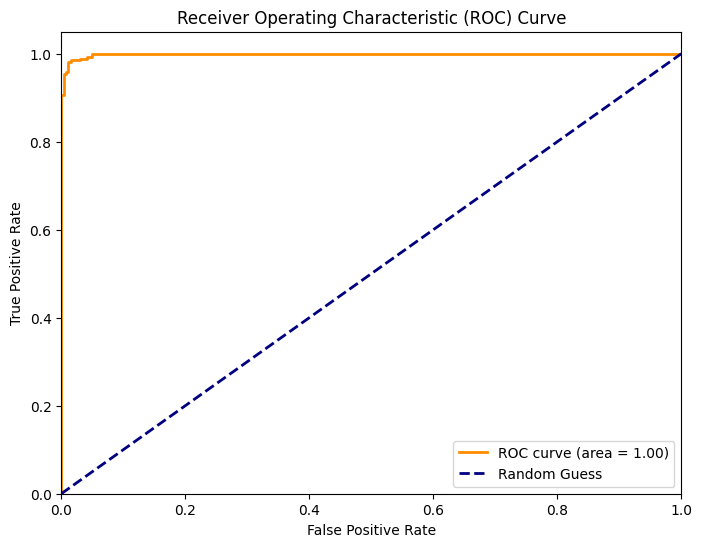

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve (area = %0.2f)' % roc_auc, 'Random Guess'], loc="lower right")
plt.show()



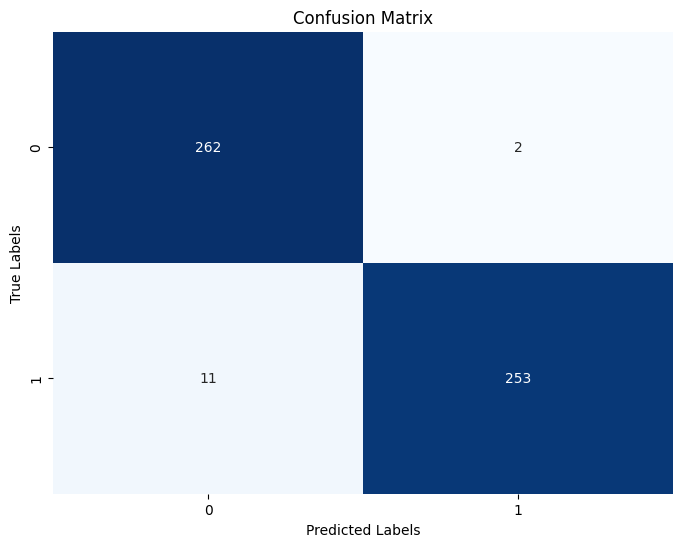

In [ ]:
import seaborn as sns
# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-17-e27860fc839d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')


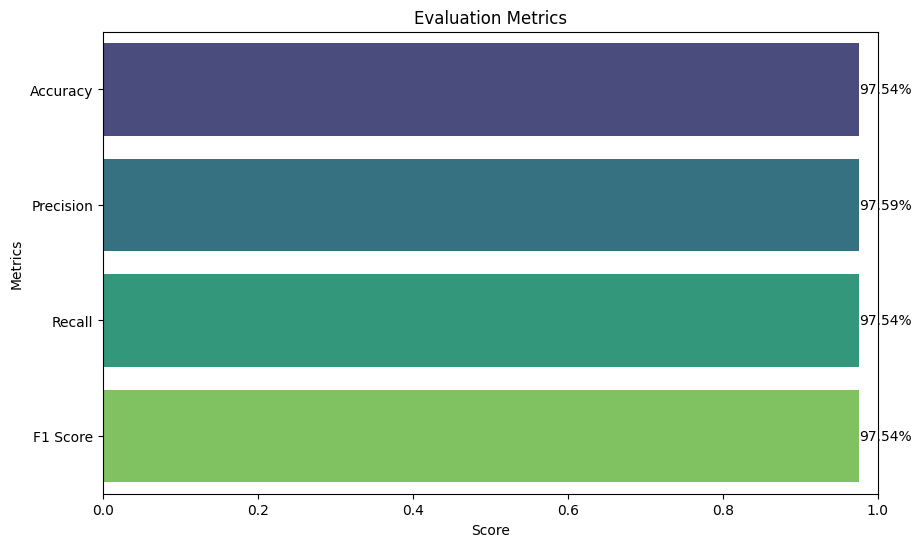

In [ ]:
# Create a bar plot for the evaluation metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [acc_score, precision, recall, f1]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')

# Add percentage values on each bar
for bar, val in zip(bars.patches, metrics_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val*100:.2f}%',
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Score')
plt.ylabel('Metrics')
plt.title('Evaluation Metrics')
plt.xlim(0, 1)
plt.show()
